                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4.960
Date:                Sun, 09 Feb 2025   Prob (F-statistic):             0.0323
Time:                        18:31:13   Log-Likelihood:                -82.287
No. Observations:                  38   AIC:                             168.6
Df Residuals:                      36   BIC:                             171.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                59.9394      5.22

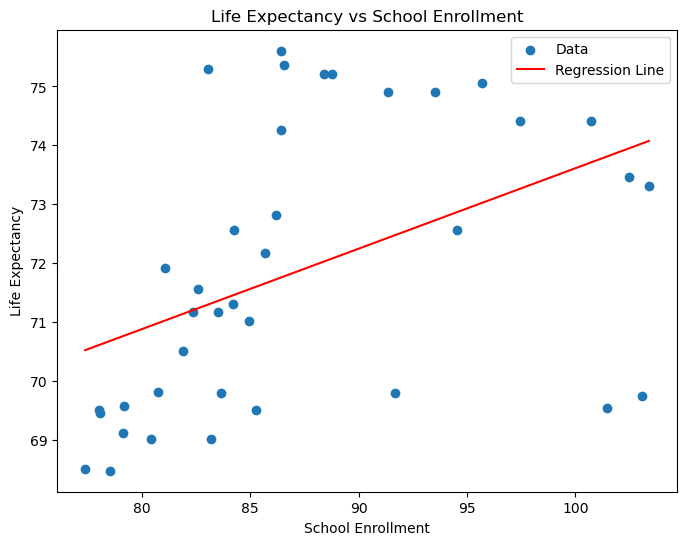

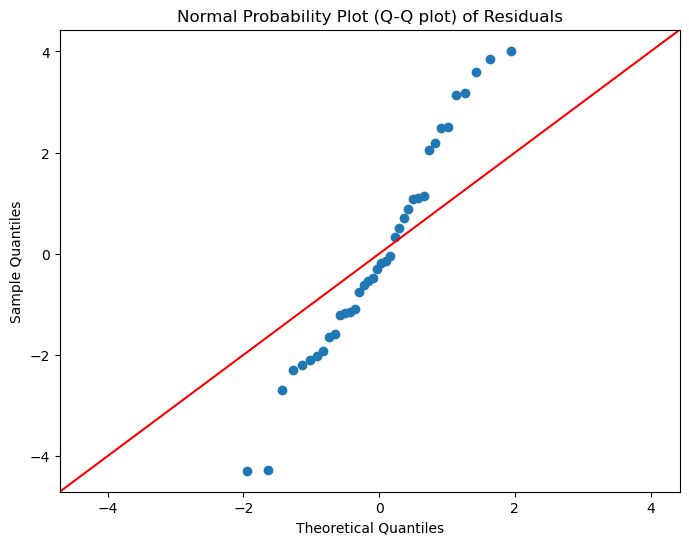

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.gofplots import qqplot

# Load the dataset
file_path = "C:\\Users\\oro\\Downloads\\Life_Expectancy_vs_School_Enrollment_in_Romania.csv"
df = pd.read_csv(file_path)

# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'])

# Define dependent and independent variables
y = df['Life Expectancy']
X = df[['School Enrollment']]

# Add constant term for regression
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Now, get robust standard errors (HAC) by using the get_robustcov_results method
model_robust = model.get_robustcov_results(cov_type='HAC', maxlags=1)  # HAC for robust standard errors

# Print regression summary with robust standard errors
print(model_robust.summary())

# Plot the relationship between school enrollment and life expectancy
plt.figure(figsize=(8, 6))
plt.scatter(df['School Enrollment'], df['Life Expectancy'], label='Data')
plt.xlabel('School Enrollment')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs School Enrollment')

# Regression line
school_enrollment_range = np.linspace(df['School Enrollment'].min(), df['School Enrollment'].max(), 100)
X_pred = pd.DataFrame({'const': 1, 'School Enrollment': school_enrollment_range})
predicted_life_expectancy = model_robust.predict(X_pred)
plt.plot(school_enrollment_range, predicted_life_expectancy, color='red', label='Regression Line')

plt.legend()
plt.show()  # First plot

# Normal Probability Plot (Q-Q plot) for residuals
residuals = model_robust.resid

# Create Q-Q plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='45', ax=plt.gca())  # The '45' line is the reference line for a normal distribution
plt.title('Normal Probability Plot (Q-Q plot) of Residuals')
plt.show()  # Second plot
